In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import neural_network
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def SVM(Data,title='Linearly Seperable'):
  print('*'*35,' SVM ','*'*35)

  # shuffling the data
  np.random.shuffle(Data)
  f = 0.7
  # Train and test data
  train,test = Data[:int(f*Data.shape[0])],Data[int(f*Data.shape[0]):]
  X_Train,y_Train = train[:,:-1],train[:,-1]
  X_Test ,y       = test [:,:-1],test [:,-1]

  # initialising support vector classifier
  clf_svm = svm.SVC()
  clf_svm.fit(X_Train, y_Train)
  Prediction =  clf_svm.predict(X_Test)

  # Making the CM
  d = Data.shape[1]
  Confusion_Matrix = np.zeros((d-1,d-1))
  #Confusion Matrix
  for og_class in [-1,1]:
      for pred_class in [-1,1]:
          Confusion_Matrix[(og_class+1)//2][(pred_class+1)//2] = sum(y[Prediction==pred_class]==og_class)


  # Calculating the confusion matrix
  Confusion_Matrix = np.int64(Confusion_Matrix)
  Accuracy,Precision,Recall,F1_score = 0,0,0,0

  # Calculating various parameters
  for i in range(2):
      Accuracy += Confusion_Matrix[i][i]
      if sum(Confusion_Matrix[i]):Precision+= Confusion_Matrix[i][i]/sum(Confusion_Matrix[i])*sum(Confusion_Matrix[:,i])
      if sum(Confusion_Matrix[:,i]):Recall+=Confusion_Matrix[i][i]/sum(Confusion_Matrix[:,i])*sum(Confusion_Matrix[:,i])
  if Confusion_Matrix.sum():
      Accuracy /=Confusion_Matrix.sum()
      Precision/=Confusion_Matrix.sum()
      Recall   /=Confusion_Matrix.sum()
  try:F1_score = 2*(Precision*Recall)/(Precision+Recall)
  except:F1_score = 0

  print('Confusion Matrix:\n',Confusion_Matrix)
  print('Accuracy:\t',np.around(Accuracy,4))
  print('Precision:\t',np.around(Precision,4))
  print('Recall:\t\t',np.around(Recall,4))
  print('F1-Score:\t',np.around(F1_score,4))
  print('\n')

  h = 1e-2  # step size in the mesh
  # create a mesh to plot in
  x_min, x_max = 0,1
  y_min, y_max = 0,1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, m_max]x[y_min, y_max].
  Z = clf_svm.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)

  # Plotting functons
  fig,ax = plt.subplots(1,2,squeeze=False,figsize=(10,5))
  fig.text(0.5,1,'SVM',color='Red',fontsize=15,fontweight='bold')
  ax[0][0].set_title(title+'\nTrain Data')
  ax[0][0].scatter(train[train[:,-1]==-1][:,0],train[train[:,-1]==-1][:,1],label='Class:-1',color='C0')
  ax[0][0].scatter(train[train[:,-1]== 1][:,0],train[train[:,-1]== 1][:,1],label='Class: 1',color='C3')
  ax[0][0].contour(xx, yy, Z,linestyles='dashdot',label='Decision Boundary',cmap="Greys")
  ax[0][0].set_xlabel('Attribute 1');ax[0][0].set_ylabel('Attribute 2')
  ax[0][0].grid();ax[0][0].legend()
  ax[0][0].set_xlim(-0.1,1.1);ax[0][0].set_ylim(-0.1,1.1)

  ax[0][1].set_title(title+'\nTest Data')
  for og_class in [-1,1]:
      for pred_class in [-1,1]:
          ax[0][1].scatter(test[(test[:,-1]==og_class) & (Prediction==pred_class)][:,0],test[(test[:,-1]==og_class) & (Prediction==pred_class)][:,1],
                           label='Org:'+str(og_class)+' Pred:'+str(pred_class))
  ax[0][1].contour(xx, yy, Z,linestyles='dashdot',label='Decision Boundary',cmap="Greys")
  ax[0][1].set_xlabel('Attribute 1');ax[0][1].set_ylabel('Attribute 2')
  ax[0][1].grid();ax[0][1].legend(fontsize=7)
  ax[0][1].set_xlim(-0.1,1.1);ax[0][1].set_ylim(-0.1,1.1)
  plt.tight_layout();plt.show()


In [ ]:
def Perceptron(Data,l_rate=1,epoch=1e2,tol=1e-5,title='Linearly Seperable'):
  print('*'*35,' PERCEPTRON ','*'*35)

  # shuffle the data
  np.random.shuffle(Data)
  f = 0.7

  # Train and test data
  train,test = Data[:int(f*Data.shape[0])],Data[int(f*Data.shape[0]):]

  # Data shape
  d = Data.shape[1]
  w = np.random.rand(d)

  # tolerance level
  err = 1e10

  # perceptron model
  while err>tol and epoch:
    w_prev = w.copy()
    for X in train:
      x,y = np.array([1]+list(X[:-1])),X[-1]
      if y*(w@x)<=0:
        w += l_rate*x*y
    err = sum((w-w_prev)**2)**0.5
    epoch-=1

  # making prediction on test data
  Prediction = []
  for X in test:
    x,y = np.array([1]+list(X[:-1])),X[-1]
    if (w@x)<=0:
      Prediction.append(-1)
    else:
      Prediction.append(1)
  Prediction = np.array(Prediction)
  y = test[:,-1]


  Confusion_Matrix = np.zeros((d-1,d-1))
  #Confusion Matrix
  for og_class in [-1,1]:
      for pred_class in [-1,1]:
          Confusion_Matrix[(og_class+1)//2][(pred_class+1)//2] = sum(y[Prediction==pred_class]==og_class)

  # Calculating the confusion matrix
  Confusion_Matrix = np.int64(Confusion_Matrix)
  Accuracy,Precision,Recall,F1_score = 0,0,0,0

  # calculating various parameters
  for i in range(2):
      Accuracy += Confusion_Matrix[i][i]
      if sum(Confusion_Matrix[i]):Precision+= Confusion_Matrix[i][i]/sum(Confusion_Matrix[i])*sum(Confusion_Matrix[:,i])
      if sum(Confusion_Matrix[:,i]):Recall+=Confusion_Matrix[i][i]/sum(Confusion_Matrix[:,i])*sum(Confusion_Matrix[:,i])
  if Confusion_Matrix.sum():
      Accuracy /=Confusion_Matrix.sum()
      Precision/=Confusion_Matrix.sum()
      Recall   /=Confusion_Matrix.sum()
  try:F1_score = 2*(Precision*Recall)/(Precision+Recall)
  except:F1_score = 0

  print('Confusion Matrix:\n',Confusion_Matrix)
  print('Accuracy:\t',np.around(Accuracy,4))
  print('Precision:\t',np.around(Precision,4))
  print('Recall:\t\t',np.around(Recall,4))
  print('F1-Score:\t',np.around(F1_score,4))
  print('\n')
  x = np.array([0,1]);y = -(w[0]+w[1]*x)/w[2]

  # Plotting functions
  fig,ax = plt.subplots(1,2,squeeze=False,figsize=(10,5))
  fig.text(0.45,1,'Perceptron',color='Red',fontsize=15,fontweight='bold')
  ax[0][0].set_title(title+'\nTrain Data')
  ax[0][0].scatter(train[train[:,-1]==-1][:,0],train[train[:,-1]==-1][:,1],label='Class:-1',color='C0')
  ax[0][0].scatter(train[train[:,-1]== 1][:,0],train[train[:,-1]== 1][:,1],label='Class: 1',color='C3')
  ax[0][0].plot(x,y,linestyle='-.',label='Decision Boundary',color='black')
  ax[0][0].set_xlabel('Attribute 1');ax[0][0].set_ylabel('Attribute 2')
  ax[0][0].grid();ax[0][0].legend()
  ax[0][0].set_xlim(-0.1,1.1);ax[0][0].set_ylim(-0.1,1.1)

  ax[0][1].set_title(title+'\nTest Data')
  for og_class in [-1,1]:
      for pred_class in [-1,1]:
          ax[0][1].scatter(test[(test[:,-1]==og_class) & (Prediction==pred_class)][:,0],test[(test[:,-1]==og_class) & (Prediction==pred_class)][:,1],
                           label='Org:'+str(og_class)+' Pred:'+str(pred_class))
  ax[0][1].plot(x,y,linestyle='-.',label='Decision Boundary',color='black')
  ax[0][1].set_xlabel('Attribute 1');ax[0][1].set_ylabel('Attribute 2')
  ax[0][1].grid();ax[0][1].legend(fontsize=7)
  ax[0][1].set_xlim(-0.1,1.1);ax[0][1].set_ylim(-0.1,1.1)
  plt.tight_layout();plt.show()

In [ ]:
def MLP(Data,epoch=1e2,title='Linearly Seperable'):
  print('*'*35,' MLP ','*'*35)

  # shuffling the data
  np.random.shuffle(Data)

  f = 0.7
  # Train and test data
  train,test = Data[:int(f*Data.shape[0])],Data[int(f*Data.shape[0]):]
  X_Train,y_Train = train[:,:-1],train[:,-1]
  X_Test ,y       = test [:,:-1],test [:,-1]

  # neural networks initialisation
  clf_mlp = neural_network.MLPClassifier()
  clf_mlp.fit(X_Train, y_Train)
  Prediction =  clf_mlp.predict(X_Test)

  d = Data.shape[1]
  Confusion_Matrix = np.zeros((d-1,d-1))
  #Confusion Matrix
  for og_class in [-1,1]:
      for pred_class in [-1,1]:
          Confusion_Matrix[(og_class+1)//2][(pred_class+1)//2] = sum(y[Prediction==pred_class]==og_class)


  # Calculating the confusion matrix
  Confusion_Matrix = np.int64(Confusion_Matrix)
  Accuracy,Precision,Recall,F1_score = 0,0,0,0
  for i in range(2):
      Accuracy += Confusion_Matrix[i][i]
      if sum(Confusion_Matrix[i]):Precision+= Confusion_Matrix[i][i]/sum(Confusion_Matrix[i])*sum(Confusion_Matrix[:,i])
      if sum(Confusion_Matrix[:,i]):Recall+=Confusion_Matrix[i][i]/sum(Confusion_Matrix[:,i])*sum(Confusion_Matrix[:,i])
  if Confusion_Matrix.sum():
      Accuracy /=Confusion_Matrix.sum()
      Precision/=Confusion_Matrix.sum()
      Recall   /=Confusion_Matrix.sum()
  try:F1_score = 2*(Precision*Recall)/(Precision+Recall)
  except:F1_score = 0

  print('Confusion Matrix:\n',Confusion_Matrix)
  print('Accuracy:\t',np.around(Accuracy,4))
  print('Precision:\t',np.around(Precision,4))
  print('Recall:\t\t',np.around(Recall,4))
  print('F1-Score:\t',np.around(F1_score,4))
  print('\n')

  h = 1e-2  # step size in the mesh
  # create a mesh to plot in
  x_min, x_max = 0,1
  y_min, y_max = 0,1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, m_max]x[y_min, y_max].
  Z = clf_mlp.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  fig,ax = plt.subplots(1,2,squeeze=False,figsize=(10,5))
  fig.text(0.5,1,'MLP',color='Red',fontsize=15,fontweight='bold')
  ax[0][0].set_title(title+'\nTrain Data')
  ax[0][0].scatter(train[train[:,-1]==-1][:,0],train[train[:,-1]==-1][:,1],label='Class:-1',color='C0')
  ax[0][0].scatter(train[train[:,-1]== 1][:,0],train[train[:,-1]== 1][:,1],label='Class: 1',color='C3')
  ax[0][0].contour(xx, yy, Z,linestyles='dashdot',label='Decision Boundary',cmap="Greys")
  ax[0][0].set_xlabel('Attribute 1');ax[0][0].set_ylabel('Attribute 2')
  ax[0][0].grid();ax[0][0].legend()
  ax[0][0].set_xlim(-0.1,1.1);ax[0][0].set_ylim(-0.1,1.1)

  ax[0][1].set_title(title+'\nTest Data')
  for og_class in [-1,1]:
      for pred_class in [-1,1]:
          ax[0][1].scatter(test[(test[:,-1]==og_class) & (Prediction==pred_class)][:,0],test[(test[:,-1]==og_class) & (Prediction==pred_class)][:,1],
                           label='Org:'+str(og_class)+' Pred:'+str(pred_class))
  ax[0][1].contour(xx, yy, Z,linestyles='dashdot',label='Decision Boundary',cmap="Greys")
  ax[0][1].set_xlabel('Attribute 1');ax[0][1].set_ylabel('Attribute 2')
  ax[0][1].grid();ax[0][1].legend(fontsize=7)
  ax[0][1].set_xlim(-0.1,1.1);ax[0][1].set_ylim(-0.1,1.1)
  plt.tight_layout();plt.show()

***********************************  PERCEPTRON  ***********************************
Confusion Matrix:
 [[304   0]
 [  0 296]]
Accuracy:	 1.0
Precision:	 1.0
Recall:		 1.0
F1-Score:	 1.0




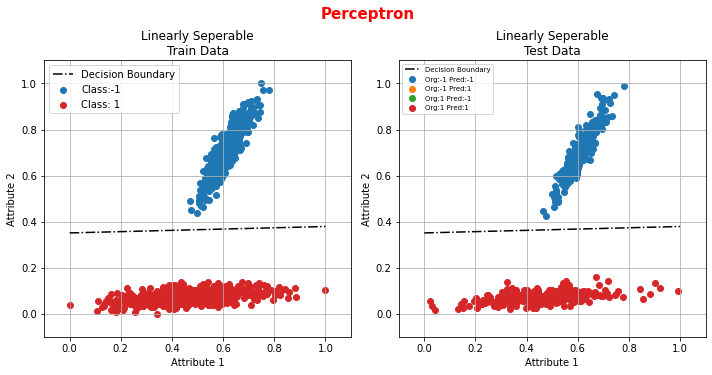

***********************************  MLP  ***********************************
Confusion Matrix:
 [[302   0]
 [  0 298]]
Accuracy:	 1.0
Precision:	 1.0
Recall:		 1.0
F1-Score:	 1.0




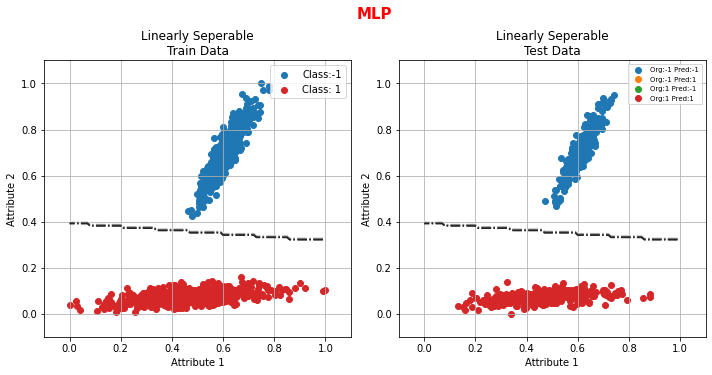

***********************************  SVM  ***********************************
Confusion Matrix:
 [[304   0]
 [  0 296]]
Accuracy:	 1.0
Precision:	 1.0
Recall:		 1.0
F1-Score:	 1.0




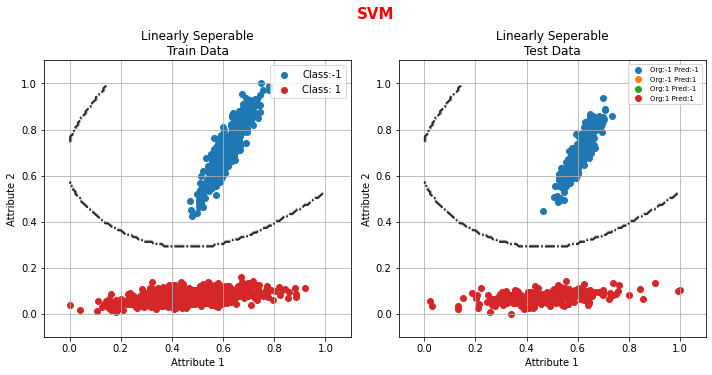

In [ ]:
#Data
C1 = pd.read_csv('class1_ls.txt',header=None)
C1['class'] = 1
C2 = pd.read_csv('class2_ls.txt',header=None)
C2['class'] = -1
Data = np.concatenate((C1,C2))
#Min-Max Normalization
Data[:,:2] = (Data[:,:2] - Data[:,:2].min(axis=0))/(Data[:,:2].max(axis=0) - Data[:,:2].min(axis=0))

# Running the code
Perceptron(Data,title='Linearly Seperable')
MLP(Data,title='Linearly Seperable')
SVM(Data,title='Linearly Seperable')

***********************************  PERCEPTRON  ***********************************
Confusion Matrix:
 [[283  13]
 [ 52 252]]
Accuracy:	 0.8917
Precision:	 0.8999
Recall:		 0.8917
F1-Score:	 0.8958




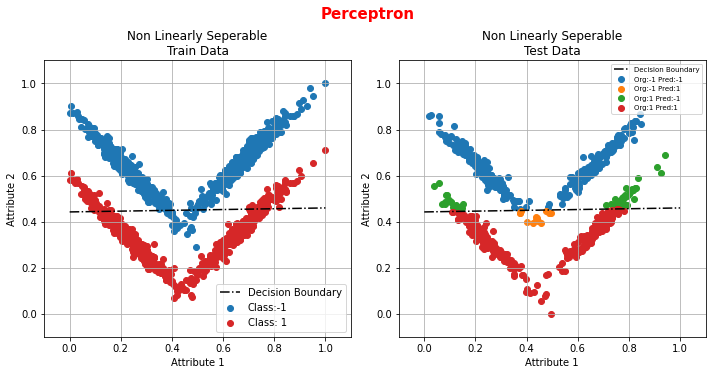

***********************************  MLP  ***********************************
Confusion Matrix:
 [[269  19]
 [ 24 288]]
Accuracy:	 0.9283
Precision:	 0.9284
Recall:		 0.9283
F1-Score:	 0.9284




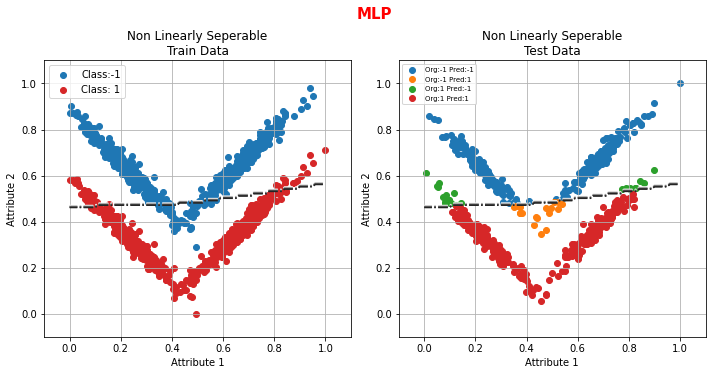

***********************************  SVM  ***********************************
Confusion Matrix:
 [[305   1]
 [  0 294]]
Accuracy:	 0.9983
Precision:	 0.9983
Recall:		 0.9983
F1-Score:	 0.9983




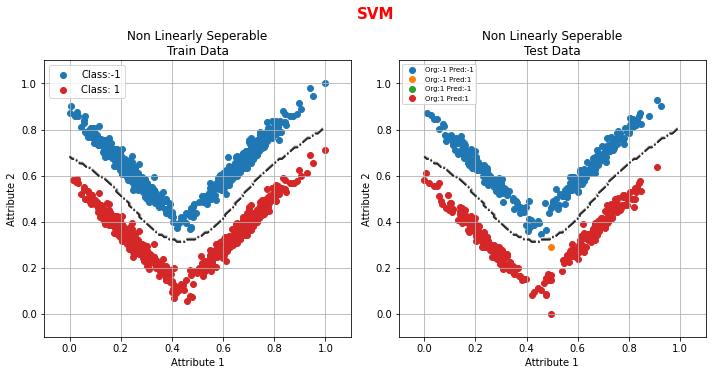

In [ ]:
#Data
C1 = pd.read_csv('class1_nls.txt',header=None)
C1['class'] =  1
C2 = pd.read_csv('class2_nls.txt',header=None)
C2['class'] = -1
Data = np.concatenate((C1,C2))
#Min-Max Normalization
Data[:,:2] = (Data[:,:2] - Data[:,:2].min(axis=0))/(Data[:,:2].max(axis=0) - Data[:,:2].min(axis=0))

Perceptron(Data,l_rate=0.05,epoch=500,title='Non Linearly Seperable')
MLP(Data,title='Non Linearly Seperable')
SVM(Data,title='Non Linearly Seperable')